## Assignment 6
## Multilayer perceptron. Backpropagation.

The goal of this task is to train a multilayer perceptron for classification using backpropagation.

The model is defined in the following way.

$z_1 = W_1x + b_1,$

$h = \tanh(z_1),$

$z_2 = W_2h + b_2,$

$y = \mathrm{softmax}(z_2),$

$L = -\sum_{i} t\log y.$

Where $x$ is the input vector. The cross-entropy loss function is used, where $t$ are targets represented as one-hot vectors. And you also need to add $L_2$ regularization on $W_1$ and $W_2$.

The task is to classify hand-written digits from MNIST dataset, there are 10 classes in total, each corresponds to a different digit. The task is to train the classifier using stochastic gradient descent (SGD). So, you need to compute gradients for each parameter of the model, i.e. $W_1$, $b_1$, $W_2$, $b_2$.

The code below loads the dataset, there are 1797 samples in total. You need to split the dataset into two parts, 80 percent of the samples for the training set and the remaining 20 percent for the test set. Make sure that both contain all kinds of digits. Each of the samples in a greyscale image 8x8 which is represented as a 64-dimensional vector when given as an input to the neural network classifier. Use dimension 50 for the hidden layer $h$ in the beginning. You are welcome to play with this parameter after you finish the implementation to see how it affects the results.

Plot the value of the loss function after each epoch and also plot the classification accuracy for the training and the test set on the same plot.

**Bonus.** 
Besides cross-entropy loss, you are welcome to try multi-class hinge loss described on the following web-page and compare it to cross-entropy loss in terms of accuracy. Try to avoid using for loops in your implementation so that your code is fully vectorized.
http://cs231n.github.io/linear-classify/


C:\Users\serge\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


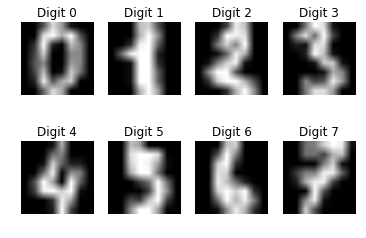

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import datasets,svm, metrics

digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear')
    plt.title('Digit %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
targets = []

for i in digits.target:
    t = np.array(10*[0.0])
    t[i] = 1
    targets.append(t.reshape(10,1))
targets = np.array(targets)

In [28]:
class Multilayer_perceptron(object):   
    def __init__(self, learning_rate = 0.1, epoch = 5000, lam = 0.001):
        self.w_1 = np.random.normal(-0.01, 0.01, (50, 64))
        self.w_2 = np.random.normal(-0.01, 0.01, (10, 50))
        self.b_1 = np.random.normal(-0.01, 0.01, (50, 1))
        self.b_2 = np.random.normal(-0.01, 0.01, (10, 1))
        self.learning_rate = np.array([learning_rate])
        self.epoch = epoch
        self.lam = lam
        
    def th(self, z):
        return (np.exp(2*z) - 1)/(np.exp(2*z) + 1)
    
    def softmax(self, z):
        e_z = np.exp(z - np.max(z))
        return e_z / e_z.sum()
    
    def cross_enthrophy(self, target, y):
        L = -sum(target*np.log(y))
        return L
    
    def predict(self, x):
        x_0 = x.reshape(64, 1)
        z_1 = self.w_1@x_0 + self.b_1 + self.lam*self.__L_2__(self.w_1)
        h = self.th(z_1)
        z_2 = self.w_2@h + self.b_2 + self.lam*self.__L_2__(self.w_2)
        y = self.softmax(z_2)
        return y
    
    def __L_2__ (self, arr):
        l_2 = 0
        for i in range(len(arr)):
            for a in arr[i]:
                l_2 += a**2
        return l_2

    def score(self, data, targets):
        true_predict = 0
        for i in range(len(targets)):
            y = self.predict(data[i])
            if sum(abs(y - targets[i]))/2 <= 0.5 :
                true_predict += 1
        return true_predict/len(targets)
    
    def train(self, x, t):
        L = []
        current_epoch = 1
        while self.epoch >= current_epoch:
            y = 0
            l_i = []
            for i in range(len(t)):
                x_0 = x[i].reshape(64, 1)
                z_1 = self.w_1@x_0 + self.b_1 + self.lam*self.__L_2__(self.w_1)
                h = self.th(z_1)
                z_2 = self.w_2@h + self.b_2 + self.lam*self.__L_2__(self.w_2)
                y = self.softmax(z_2)
                x_i = x[i].reshape(1, 64)
                l_i.append(self.cross_enthrophy(t[i], y))
                d_w1 = ((y-t[i]).T@self.w_2).T*(1-h**2)@x_i + self.lam*2*self.w_1
                d_w2 = (y-t[i])*h.T + self.lam*2*self.w_2
                self.w_1 -= self.learning_rate*d_w1
                self.w_2 -= self.learning_rate*d_w2
            L.append([current_epoch, np.mean(l_i)])
            current_epoch += 1
        return L

In [36]:
epochs = 150
learning_rate = 0.003
lam = 0.002
network = Multilayer_perceptron(learning_rate=learning_rate, epoch=epochs, lam = lam)
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = 0.2, random_state = 0)
L = network.train(X_train, y_train)

In [37]:
accuracy = network.score(X_test, y_test)
print(accuracy)

0.9777777777777777


In [38]:
Loss = np.array(L).T

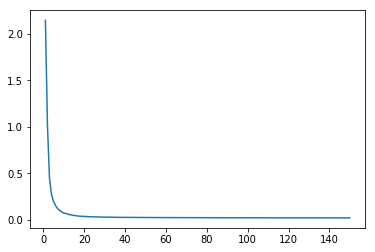

In [39]:
plt.plot(Loss[0],Loss[1])
plt.show()